In [1]:
# import  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style 
sns.set(style="whitegrid")

In [3]:
file_path = 'data_files/KAG_conversion_data.csv'

# Load the dataset
df = pd.read_csv(file_path)

print("Data loaded successfully!")
print(df.head())

Data loaded successfully!
    ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0  708746              916          103916  30-34      M        15   
1  708749              916          103917  30-34      M        16   
2  708771              916          103920  30-34      M        20   
3  708815              916          103928  30-34      M        28   
4  708818              916          103928  30-34      M        28   

   Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  
0         7350       1   1.43                 2                    1  
1        17861       2   1.82                 2                    0  
2          693       0   0.00                 1                    0  
3         4259       1   1.25                 1                    0  
4         4133       1   1.29                 1                    1  


In [5]:
# Get basic information about the dataset
print("\nDataset Information:")
df.info()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [7]:
# Check for any missing values
print(f"\nMissing values in any column: {df.isnull().values.any()}")



Missing values in any column: False


In [9]:
# For clarity, let's rename some columns
df.rename(columns={
    'Spent': 'Spend',
    'Total_Conversion': 'TotalConversions',
    'Approved_Conversion': 'Conversions'
}, inplace=True)

print("\nRenamed columns for clarity.")


Renamed columns for clarity.


In [11]:
# Calculate total values
total_impressions = df['Impressions'].sum()
total_clicks = df['Clicks'].sum()
total_spend = df['Spend'].sum()
total_conversions = df['Conversions'].sum()

In [13]:
# Calculate overall KPIs
overall_ctr = (total_clicks / total_impressions) * 100
overall_cpc = total_spend / total_clicks
overall_conversion_rate = (total_conversions / total_clicks) * 100
overall_cpa = total_spend / total_conversions


In [15]:
print("--- Overall Campaign Performance ---")
print(f"Click-Through Rate (CTR): {overall_ctr:.2f}%")
print(f"Cost Per Click (CPC): ${overall_cpc:.2f}")
print(f"Conversion Rate (CR): {overall_conversion_rate:.2f}%")
print(f"Cost Per Acquisition (CPA): ${overall_cpa:.2f}")

--- Overall Campaign Performance ---
Click-Through Rate (CTR): 0.02%
Cost Per Click (CPC): $1.54
Conversion Rate (CR): 2.83%
Cost Per Acquisition (CPA): $54.41


In [17]:
# Group by campaign ID
campaign_performance = df.groupby('xyz_campaign_id').agg({
    'Spend': 'sum',
    'Clicks': 'sum',
    'Conversions': 'sum'
})

In [19]:
# Calculate CPA for each campaign
campaign_performance['CPA'] = campaign_performance['Spend'] / campaign_performance['Conversions']
campaign_performance.sort_values(by='CPA', inplace=True)

print("\n--- Performance by Campaign ---")
display(campaign_performance)



--- Performance by Campaign ---


,Spend,Clicks,Conversions,CPA
xyz_campaign_id,,,,
916,149.710001,113,24,6.237917
936,2893.369999,1984,183,15.810765
1178,55662.149959,36068,872,63.832741


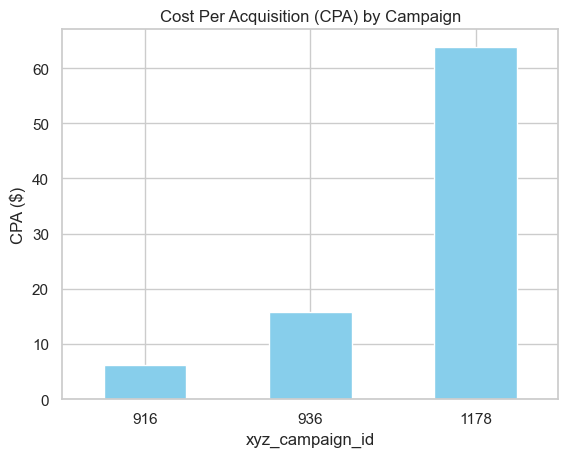

In [21]:
# Visualize CPA by Campaign
campaign_performance['CPA'].plot(kind='bar', color='skyblue')
plt.title('Cost Per Acquisition (CPA) by Campaign')
plt.ylabel('CPA ($)')
plt.xticks(rotation=0)
plt.show()


--- Performance by Age Group ---


,Spend,Clicks,Conversions,CPA
age,,,,
30-34,15252.399986,9483,494,30.875304
35-39,11112.429994,7094,207,53.683237
40-44,11589.729981,7736,170,68.174882
45-49,20750.669997,13852,208,99.762837


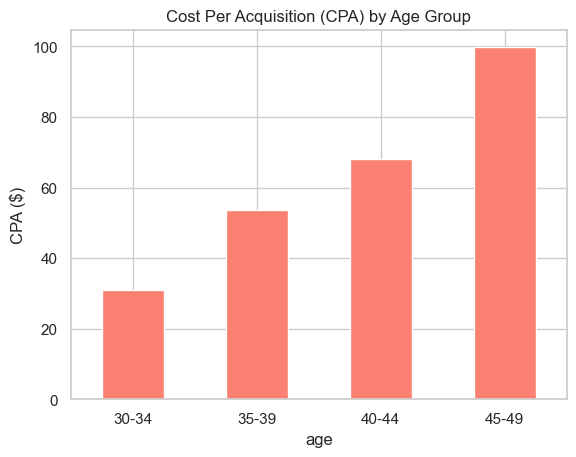

In [23]:
# Group by age
age_performance = df.groupby('age').agg({
    'Spend': 'sum',
    'Clicks': 'sum',
    'Conversions': 'sum'
})

# Calculate CPA for each age group
age_performance['CPA'] = age_performance['Spend'] / age_performance['Conversions']
age_performance.sort_values(by='CPA', inplace=True)


print("\n--- Performance by Age Group ---")
display(age_performance)

# Visualize CPA by Age Group
age_performance['CPA'].plot(kind='bar', color='salmon')
plt.title('Cost Per Acquisition (CPA) by Age Group')
plt.ylabel('CPA ($)')
plt.xticks(rotation=0)
plt.show()

***This analysis resulted in a clear optimization strategy. I found that marketing spend was highly inefficient in some areas. The results showed that Campaign 1178 and the 30-34 age group had the lowest Cost Per Acquisition (CPA). This insight allows the business to reallocate its budget away from ineffective campaigns and double down on the ones that provide the best return on investment.***